In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [42]:
img= cv2.imread("images/1-Saint-Basils-Cathedral.jpg")

In [43]:
img.shape

(600, 394, 3)

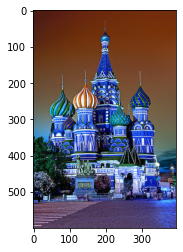

In [44]:
plt.imshow(img)
plt.show()

In [69]:
img= cv2.imread("images/1-Saint-Basils-Cathedral.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

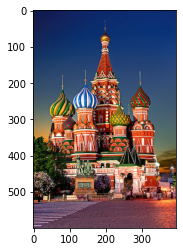

In [70]:
plt.imshow(img)
plt.show()

In [71]:
img.shape

(600, 394, 3)

In [72]:
all_pixels=img.reshape((-1,3))

In [73]:
all_pixels.shape

(236400, 3)

In [74]:
all_pixels.shape

(236400, 3)

In [75]:
from sklearn.cluster import KMeans

In [76]:
k=9
km=KMeans(n_clusters=k)

In [77]:
km.fit(all_pixels)

KMeans(n_clusters=9)

In [78]:
km.cluster_centers_

array([[ 18.09984181,  50.22784115, 109.20036633],
       [210.50946759, 165.29011658, 138.68879483],
       [ 96.7017486 ,  63.70254042,  64.50135269],
       [225.15397433, 105.05726981,  50.28276969],
       [ 28.38300858,  23.64116465,  13.15454285],
       [241.10044313, 231.70944478, 216.14336606],
       [130.09175686, 110.40920951, 102.94776768],
       [ 54.79258389,  83.86919659, 115.82325451],
       [166.32233949,  39.18293755,  17.62972735]])

In [79]:
centers=np.array(km.cluster_centers_,dtype="uint")

In [80]:
centers

array([[ 18,  50, 109],
       [210, 165, 138],
       [ 96,  63,  64],
       [225, 105,  50],
       [ 28,  23,  13],
       [241, 231, 216],
       [130, 110, 102],
       [ 54,  83, 115],
       [166,  39,  17]], dtype=uint32)

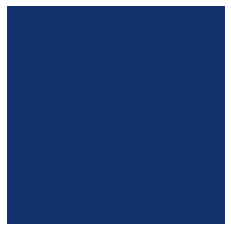

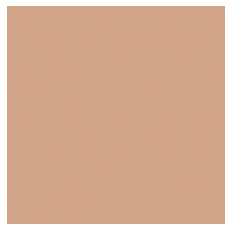

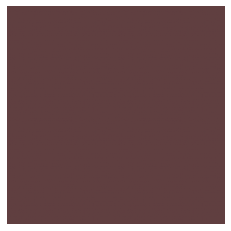

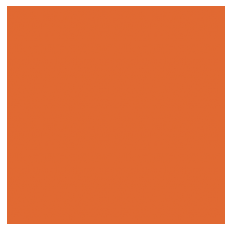

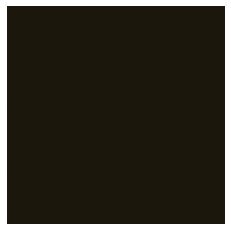

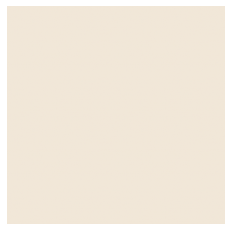

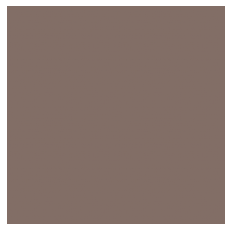

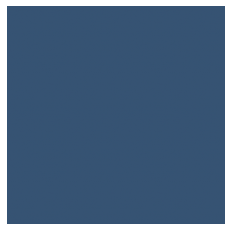

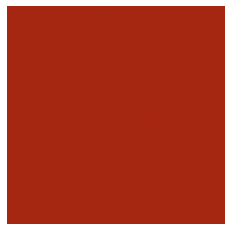

In [81]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [82]:
km.labels_

array([0, 0, 0, ..., 3, 2, 2])

In [83]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [84]:
new_img.shape


(236400, 3)

In [85]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [86]:
new_img


array([[ 18,  50, 109],
       [ 18,  50, 109],
       [ 18,  50, 109],
       ...,
       [225, 105,  50],
       [ 96,  63,  64],
       [ 96,  63,  64]], dtype=uint32)

In [87]:
new_img.shape


(236400, 3)

In [90]:
new_img = new_img.reshape((600,394,3))


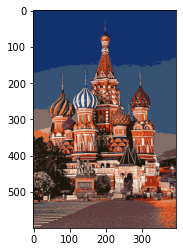

In [91]:
plt.imshow(new_img)
plt.show()

In [94]:
numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)

(hist, _) = np.histogram(km.labels_, bins = numLabels)
# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()
       

In [92]:
def plot_colors(hist, centroids):
        # initialize the bar chart representing the relative frequency
        # of each of the colors
        bar = np.zeros((50, 300, 3), dtype = "uint8")
        startX = 0
        # loop over the percentage of each cluster and the color of
        # each cluster
        for (percent, color) in zip(hist, centroids):
            #The zip() function returns an 
            #iterator of tuples based on the iterable objects
            # plot the relative percentage of each cluster
            #zip() returns an iterator of 
            #tuples with each tuple having only one element.
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                color.astype("uint8").tolist(), -1)
            startX = endX

        # return the bar chart
        return bar

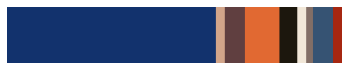

In [93]:
bar = plot_colors(hist, km.cluster_centers_)
# show our color bart
plt.imshow(img)
plt.axis("off")
plt.imshow(bar)
plt.show()